In [3]:
import cv2  
import numpy as np
import matplotlib.pyplot as plot

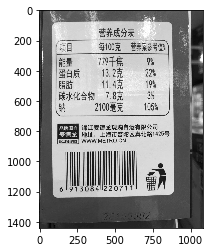

In [4]:
src = cv2.imread('1.jpg', 0)
#cv2.cvtColor(src, cv2.COLOR_RGB2GRAY)
plot.imshow(src,cmap='gray')
plot.show()

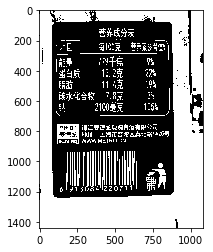

In [16]:
_, binaryImage = cv2.threshold(src, 0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
white = cv2.countNonZero(binaryImage)
#rows, cols = cv2.GetSize(binaryImage)
black = binaryImage.shape[0] * binaryImage.shape[1] - white
binaryImage = 255 - binaryImage
if white < black:
    binaryImage = 255 - binaryImage
plot.imshow(binaryImage, cmap='gray')
plot.show()

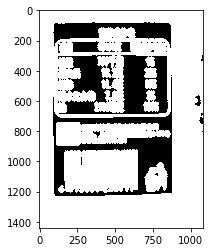

In [17]:
kernel=np.uint8(np.zeros((3,3)))  
for x in range(3):  
    kernel[x,1]=1  
    kernel[1,x]=1
dilated = cv2.dilate(binaryImage,kernel,iterations = 10)  
plot.imshow(dilated, cmap='gray')
plot.show()

In [25]:
_, contours, hierarchy = cv2.findContours(dilated,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(src, contours, -1, (0,255,0), 3)
contours2 = []
for cnt in contours:
    rect = cv2.minAreaRect(cnt)
    if rect.shape[0] < 20 or rect.shape[1] < 20:
        continue
    
    
#plot.imshow(src, cmap='gray')
#plot.show()